# ENGM4620 Project #2:
# Data Loading and Manipulation in Python
- Abdulla Sadoun B00900541
- Abdul Hameed Al Busaid B00832820

- Dataset used: Sri Harsha Eedala, Flight Delay Data, 2013-2023(August)
- https://www.kaggle.com/datasets/sriharshaeedala/airline-delay/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Q1) Dataset Selection and Loading
- Number of rows (samples) = 171666
- Number of columns (features) = 21
- The file format for the dataset used is a comma seperated value file
where each coloumn is seperated by a comma "," and each row is in a new line "\n"
- The headers were included from the author as the first row and I havent included them as a row in the value above
- We have included the link where the dataset was obtained from (kaggle) and the file data was read using the read_csv method from pandas


# Dataset Description
The dataset used provides detailed information on flight arrival delays for US airports from the beginning of the year 2013 to august of 2023 when it was last updated.
The data focuses primarily on delays and arrivals of flights in the given period, and includes information like the date, carrier, airport, #of arriving flights
, # of flights delayed by 15mins+, and counters like carrier_ct, weather_ct, nas_ct, security_ct, late_aircraft_ct(previous trip was delayed); these counters represent the amount of delays for that feature for eg. weather_ct is the counter for delays that occured due to the weather etc.
The other features like weather_delay and all the other ones that have "_delay" subsequent to the label are for the amount of time it was delayed for that reason and there is also a flight cancelled counter as a feature.


In [4]:
# Reading the .csv which has been downloaded and uploaded to content in colab

#df = pd.read_csv('/content/filtered_data_2020_to_2023.csv')
#df = pd.read_csv('/filtered_data_2020_to_2023.csv')
#unfiltereddf = pd.read_csv('/Airline_Delay_Cause.csv')
df = pd.read_csv('/content/Airline_Delay_Cause.csv')

In [6]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


The dataset I'm working with is too large and is causing issues in colab as it's occupying max memory. The data will be reduced to only delays from 2020 until 2022 since in 2023 the year is not complete and data only goes up to August which might be unfair due to missing out on the fall/winter months that may introduce weather delays.

In [8]:
# filtering to get the range we're working with (2020-2022)
df = df[df['year'].between(2020, 2022)]

df.to_csv('filtered_data_2020_to_2023.csv', index=False)

df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
12373,2022,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",27.0,7.0,4.37,0.00,...,0.0,0.53,0.0,0.0,351.0,211.0,0.0,124.0,0.0,16.0
12374,2022,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",69.0,3.0,0.61,0.00,...,0.0,2.37,0.0,0.0,136.0,38.0,0.0,1.0,0.0,97.0
12375,2022,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,14.0,5.28,4.34,...,0.0,0.96,0.0,2.0,917.0,413.0,372.0,94.0,0.0,38.0
12376,2022,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",47.0,10.0,5.12,0.57,...,1.0,2.31,0.0,0.0,488.0,141.0,50.0,77.0,57.0,163.0
12377,2022,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",131.0,34.0,12.08,2.70,...,0.0,12.90,7.0,0.0,4017.0,756.0,985.0,280.0,0.0,1996.0


we will take a look at the type of data in the features (columns)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59158 entries, 12373 to 71530
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 59158 non-null  int64  
 1   month                59158 non-null  int64  
 2   carrier              59158 non-null  object 
 3   carrier_name         59158 non-null  object 
 4   airport              59158 non-null  object 
 5   airport_name         59158 non-null  object 
 6   arr_flights          59039 non-null  float64
 7   arr_del15            58857 non-null  float64
 8   carrier_ct           59039 non-null  float64
 9   weather_ct           59039 non-null  float64
 10  nas_ct               59039 non-null  float64
 11  security_ct          59039 non-null  float64
 12  late_aircraft_ct     59039 non-null  float64
 13  arr_cancelled        59039 non-null  float64
 14  arr_diverted         59039 non-null  float64
 15  arr_delay            59039 non-n

Now after visualizing the data we can see that we do not have NAN values in our features to remove but we can remove some unnecessary features that are taking up too much space in memory and are repeated like the carrier and airport_name.

In [11]:
# drop the carrier, airport name coloumn as they are not useful and repeated
df.drop(columns=['carrier','airport_name'],inplace=True)

df.head()

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
12373,2022,12,Endeavor Air Inc.,ABE,27.0,7.0,4.37,0.00,2.10,0.0,0.53,0.0,0.0,351.0,211.0,0.0,124.0,0.0,16.0
12374,2022,12,Endeavor Air Inc.,ABY,69.0,3.0,0.61,0.00,0.02,0.0,2.37,0.0,0.0,136.0,38.0,0.0,1.0,0.0,97.0
12375,2022,12,Endeavor Air Inc.,AEX,62.0,14.0,5.28,4.34,3.42,0.0,0.96,0.0,2.0,917.0,413.0,372.0,94.0,0.0,38.0
12376,2022,12,Endeavor Air Inc.,AGS,47.0,10.0,5.12,0.57,1.00,1.0,2.31,0.0,0.0,488.0,141.0,50.0,77.0,57.0,163.0
12377,2022,12,Endeavor Air Inc.,ALB,131.0,34.0,12.08,2.70,6.32,0.0,12.90,7.0,0.0,4017.0,756.0,985.0,280.0,0.0,1996.0


- no NaN coloumns
- no constant value coloumns
- dropped 2023 rows as its incomplete (up to august)

# Q2) Data Exploration
- In the first part, the mean, median, standard deviation and minimum values are calculated for the quantitative features that contain values
- Other features like names of airport/carrier, and date will be excluded from this part.

In [12]:
for i in range(4,19):
    print(f'---Feature {i} ({df.iloc[:,i].name}), Summary Statistics---')
    print(f'mean = {np.mean(df.iloc[:,i])}, median = {np.median(df.iloc[:,i])}')
    print(f'standard deviation = {np.std(df.iloc[:,i])}')
    print(f'min. value = {np.min(df.iloc[:,i])}, max. value = {np.max(df.iloc[:,i])}\n')


---Feature 4 (arr_flights), Summary Statistics---
mean = 294.93853215671, median = nan
standard deviation = 836.128624096409
min. value = 1.0, max. value = 20669.0

---Feature 5 (arr_del15), Summary Statistics---
mean = 47.89661382673259, median = nan
standard deviation = 143.11322810928152
min. value = 0.0, max. value = 3479.0

---Feature 6 (carrier_ct), Summary Statistics---
mean = 18.11036264164366, median = nan
standard deviation = 49.940827373939335
min. value = 0.0, max. value = 1147.0

---Feature 7 (weather_ct), Summary Statistics---
mean = 1.935674723487864, median = nan
standard deviation = 7.203578137870381
min. value = 0.0, max. value = 226.0

---Feature 8 (nas_ct), Summary Statistics---
mean = 12.224858991514083, median = nan
standard deviation = 42.668262227931606
min. value = 0.0, max. value = 1391.74

---Feature 9 (security_ct), Summary Statistics---
mean = 0.17714104236182865, median = nan
standard deviation = 0.8723292738645356
min. value = 0.0, max. value = 58.69

---

### Q2 contd.
for this part of the notebook, we will attempt to look at the distribution of the data using a series of simple histogram.

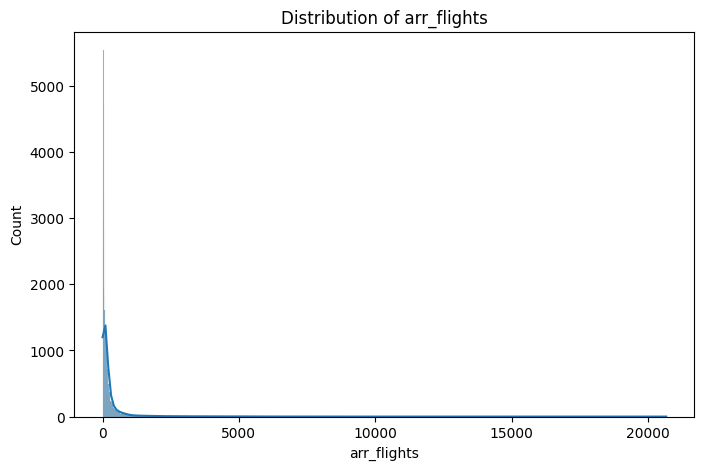

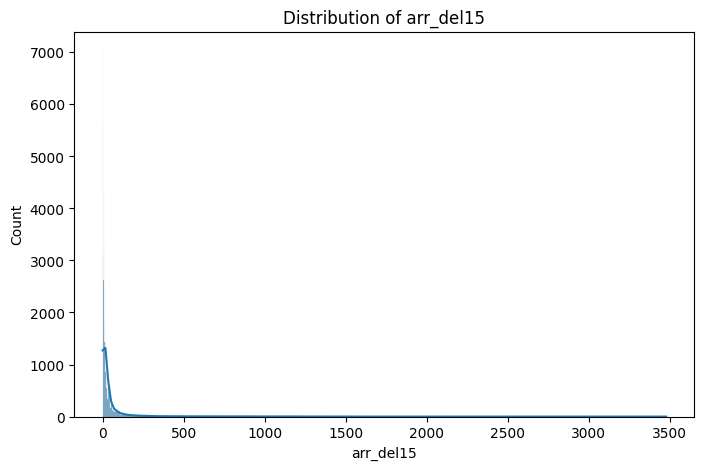

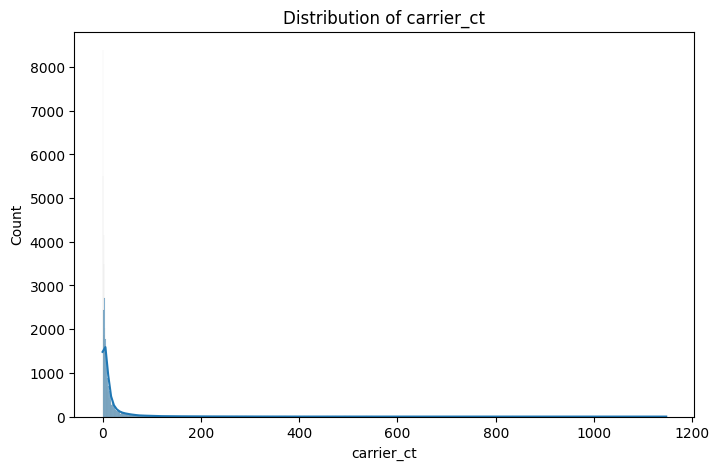

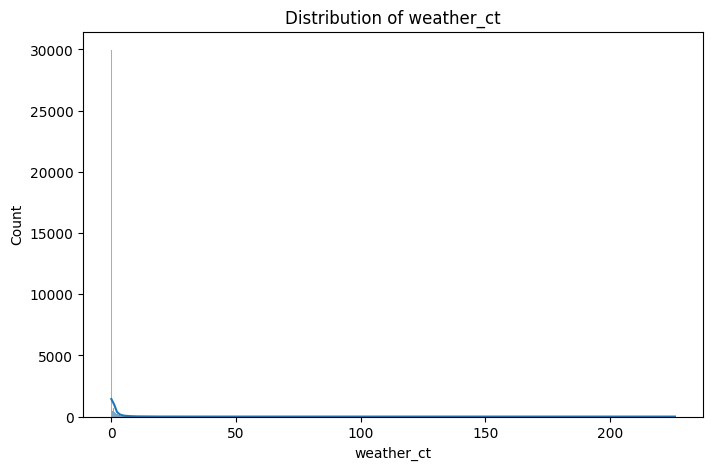

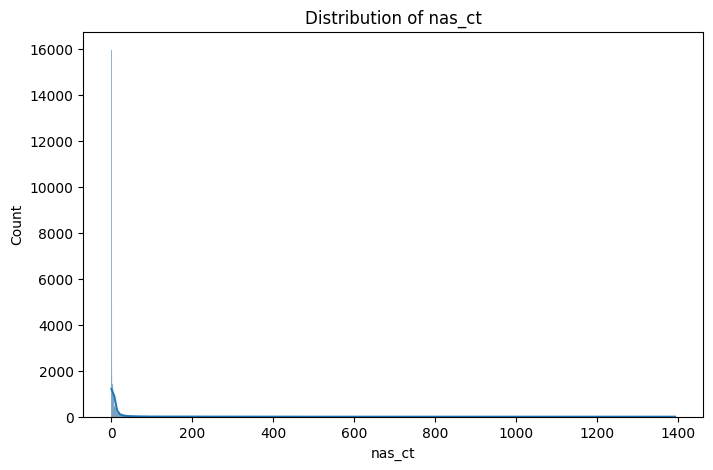

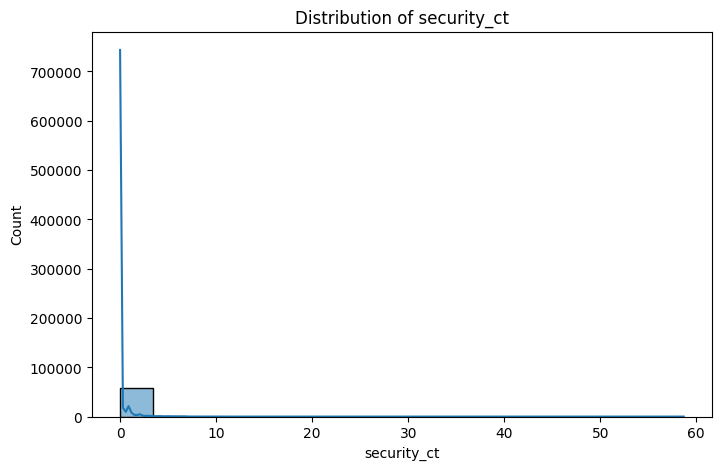

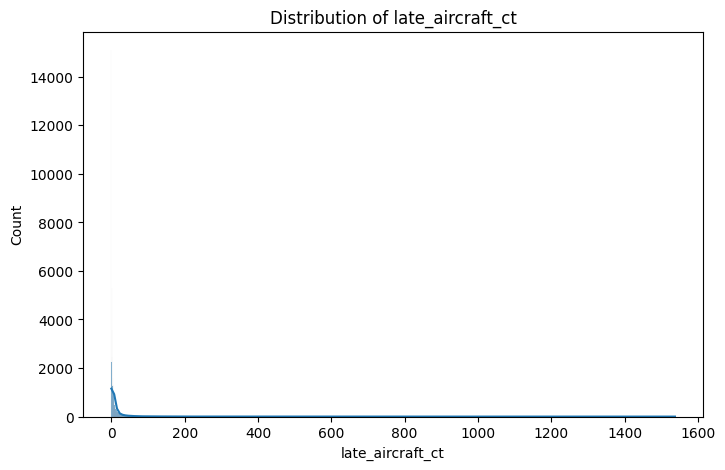

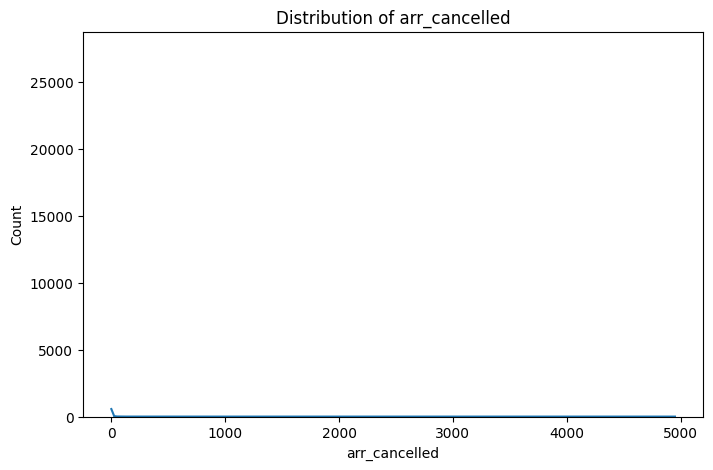

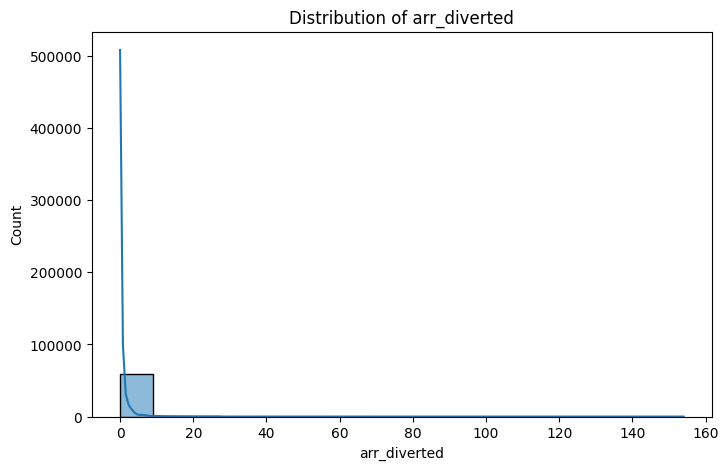

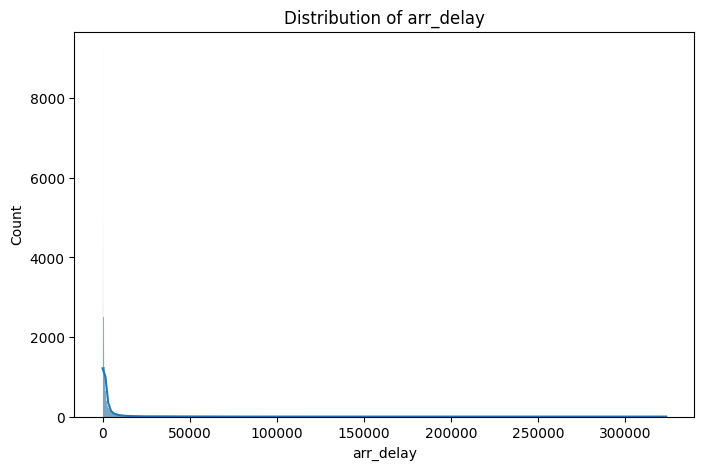

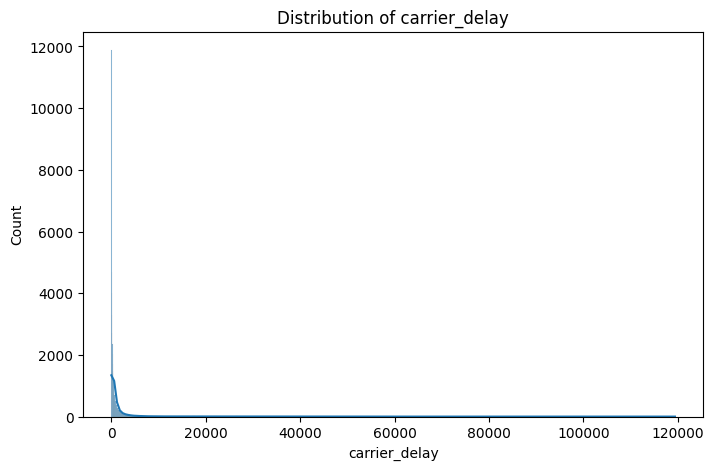

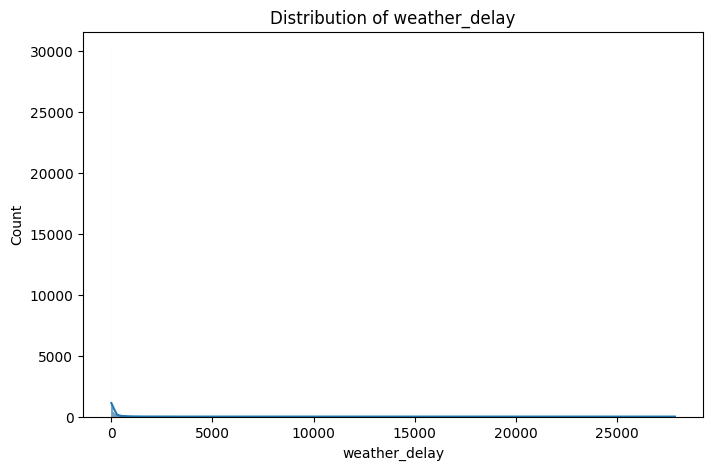

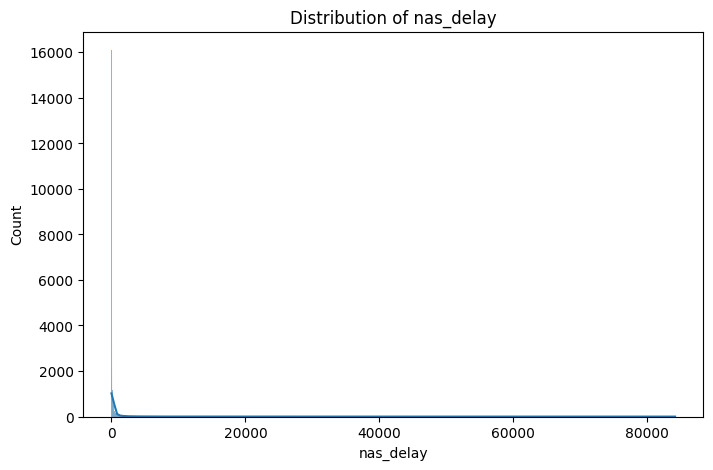

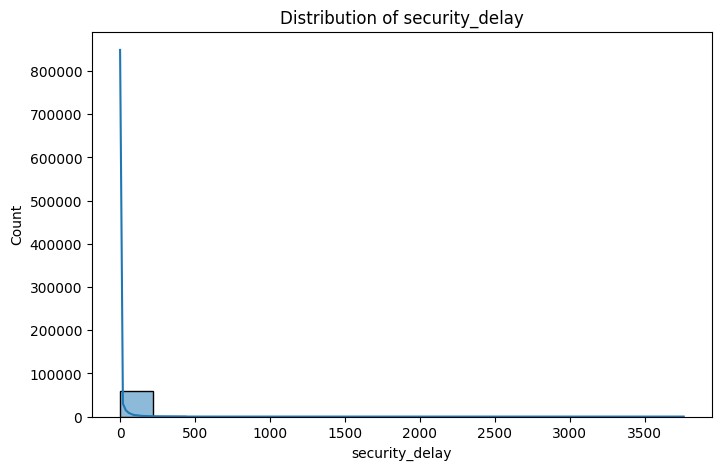

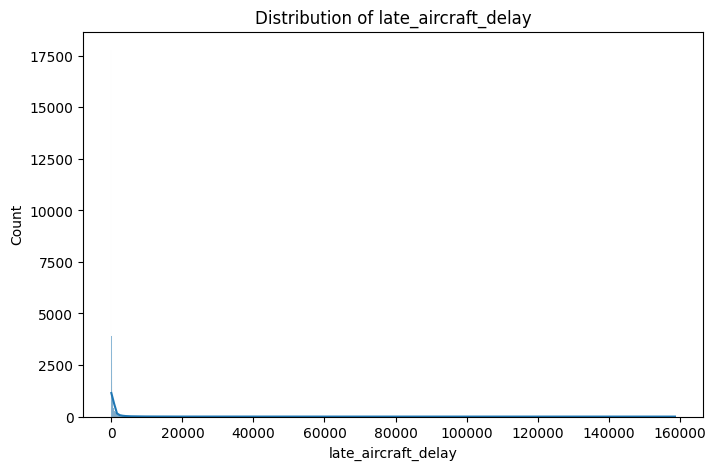

In [17]:
# Distribution of Numeric Features
quantitative_features = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
                    'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
                    'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
                    'security_delay', 'late_aircraft_delay']

for feature in quantitative_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

When looking at the data from the histograms created above we can see that they are mostly right skewed as the "tail" on the right is far smaller than the start on the left.

We will also try to visualize the distrubution of the qualitative features like the carrier_name and airport etc.

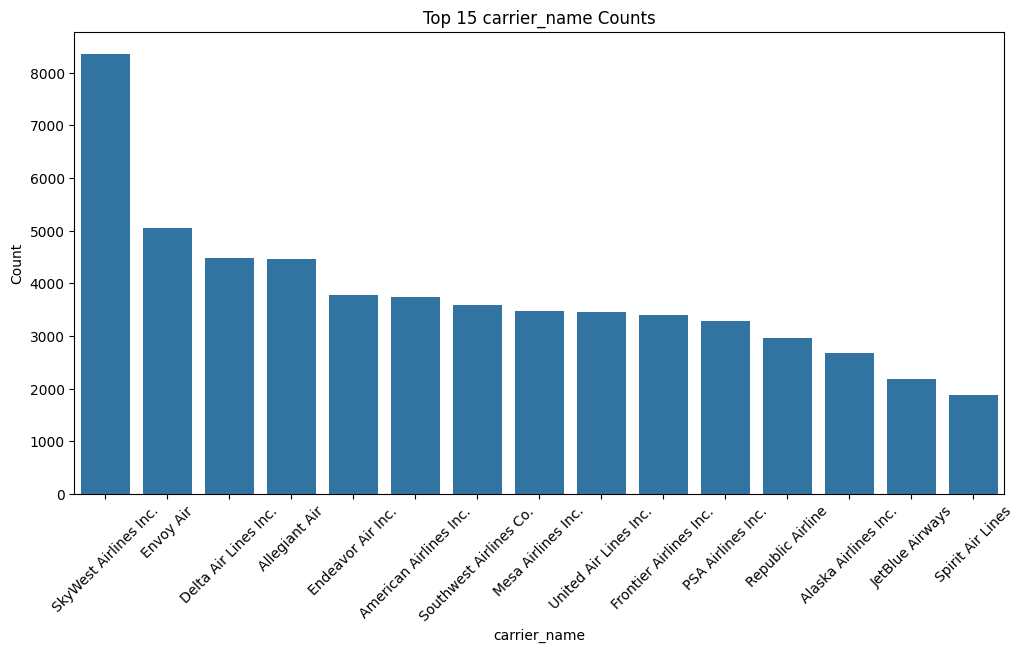

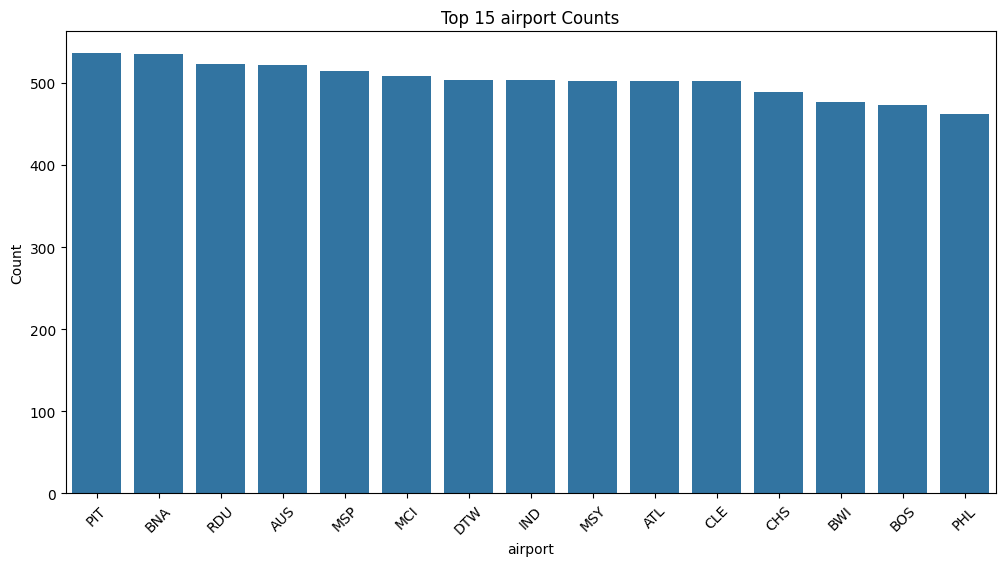

In [18]:
qualitative_features = ['carrier_name', 'airport']

for feature in qualitative_features:
    top_categories = df[feature].value_counts().nlargest(15)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values)
    plt.title(f'Top {15} {feature} Counts')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

from those histograms we can get an idea of the rank of airports and carriers that have the majority of delays in the given period we are analyzing (2020-2022)

# Q3 & Q4) Data Visualization and Manipulation
for this part we will select a series of features from the dataset and perform small analysis to find out more about the main reasons for the delays, when do they usually occur etc.
We will use all the tools in our arsenal to do this including: bar charts (stacked, regular and sorted) as well as box plots

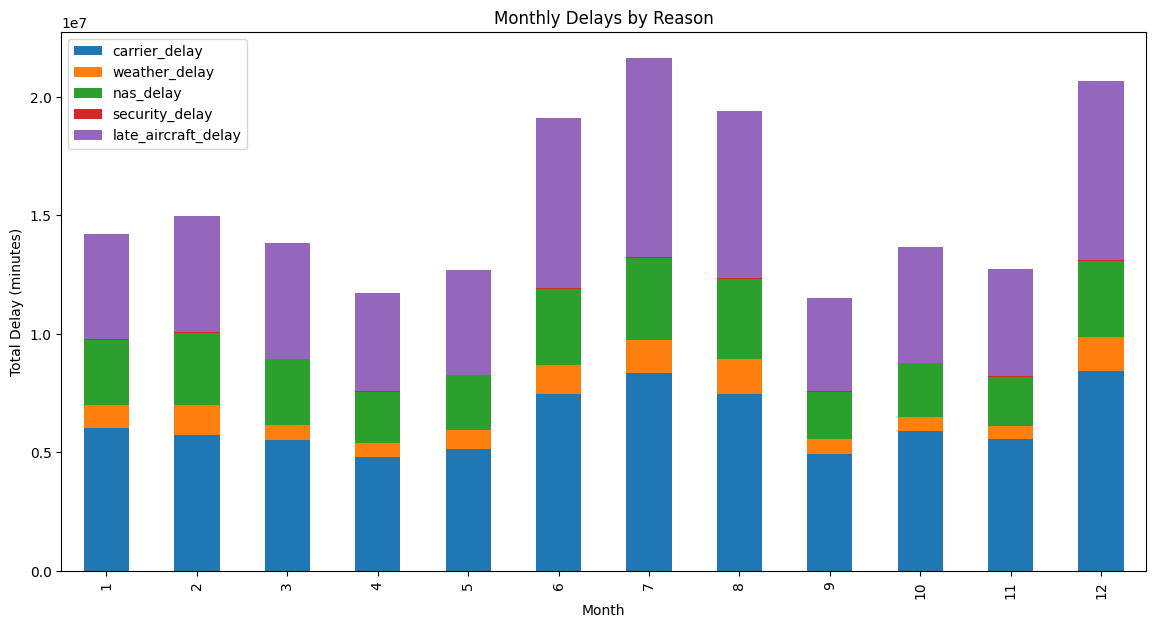

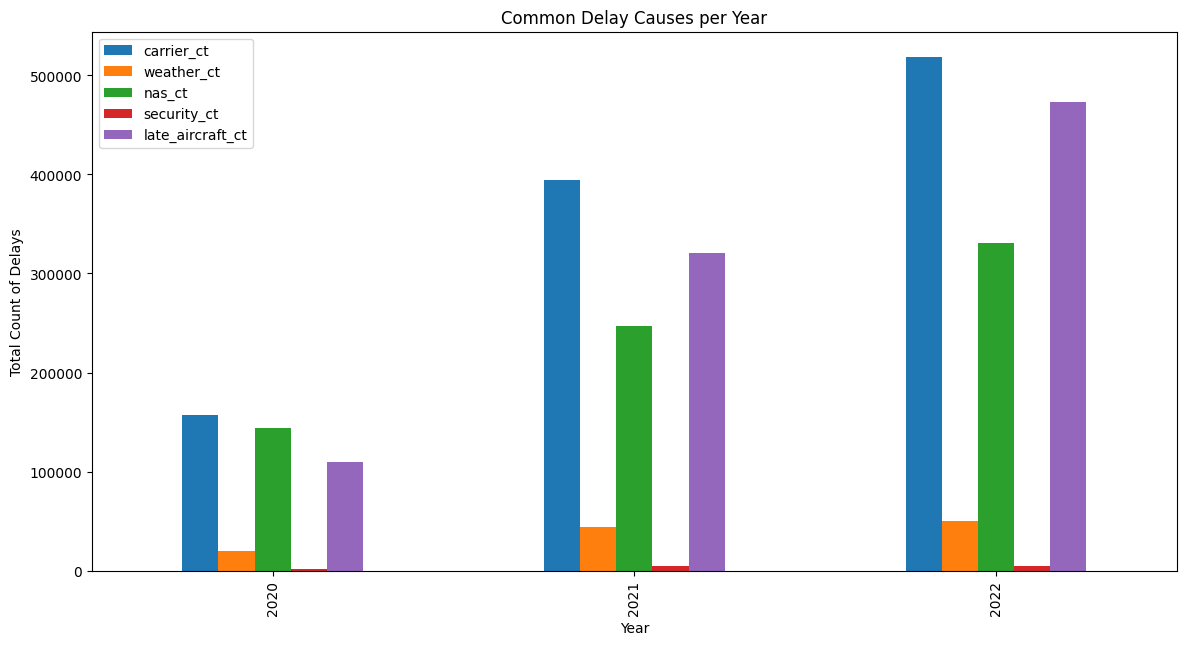

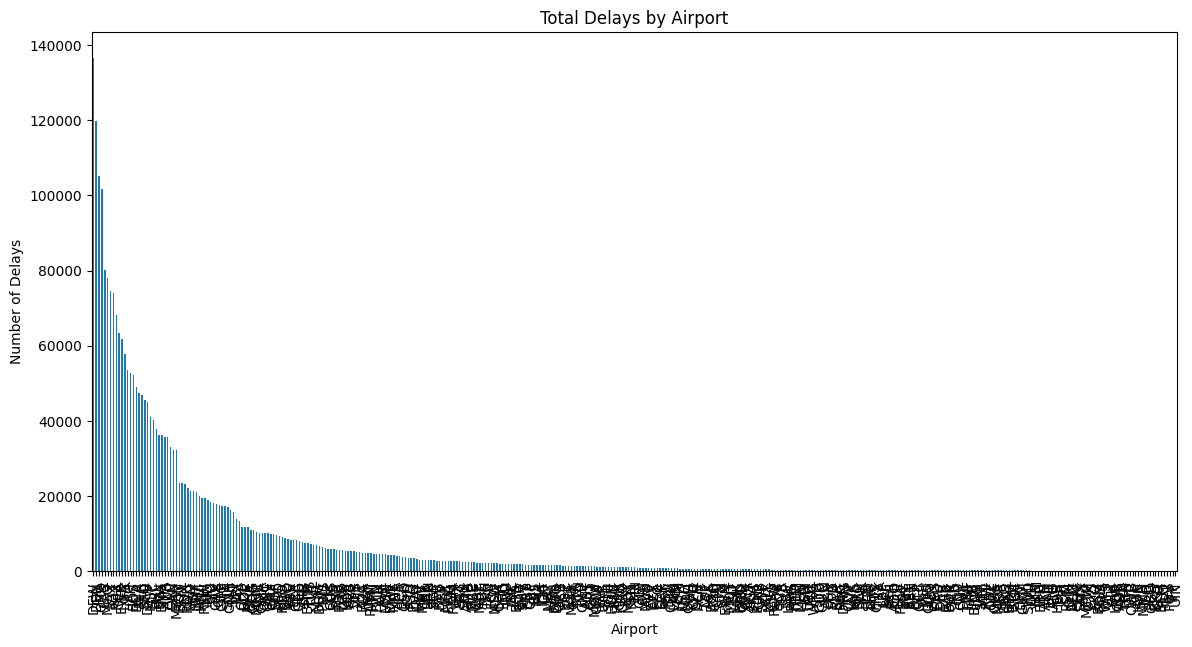

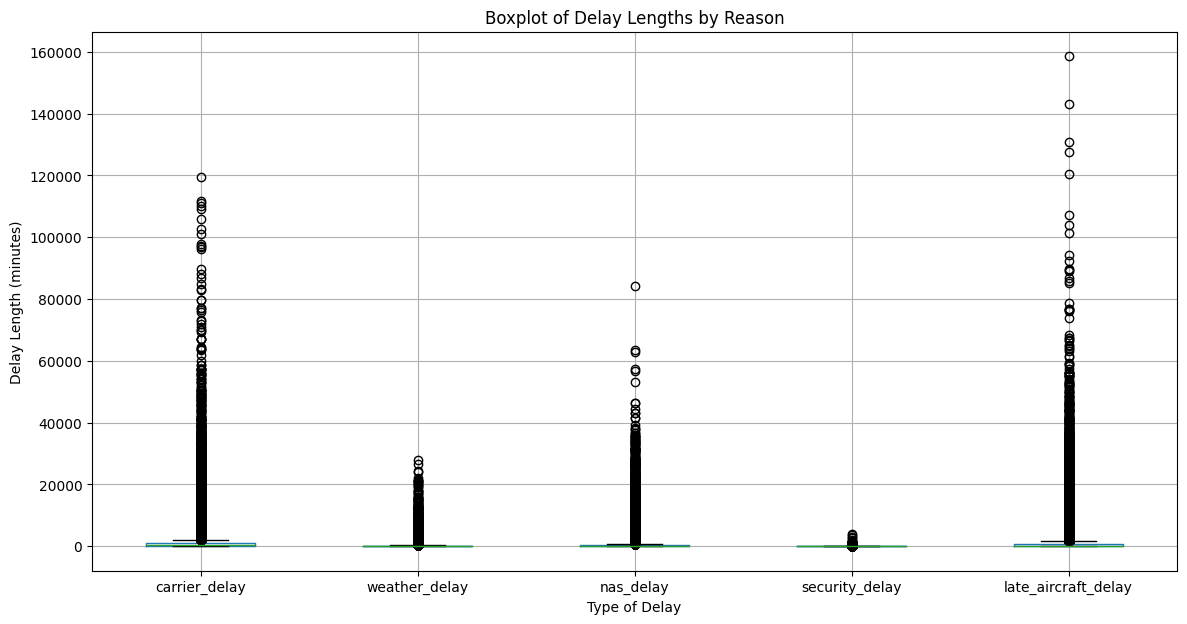

In [ ]:
# delays by Month and Reason bar chart (stacked)
monthly_delays = df.groupby('month')[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()
monthly_delays.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Monthly Delays by Reason')
plt.xlabel('Month')
plt.ylabel('Total Delay (minutes)')
plt.show()

# most/least common delay causes per year (bar charts)
annual_delay_causes = df.groupby('year')[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()
annual_delay_causes.plot(kind='bar', figsize=(14, 7))
plt.title('Common Delay Causes per Year')
plt.xlabel('Year')
plt.ylabel('Total Count of Delays')
plt.show()

# most delays by airport bar chart (sorted)
airport_delays = df.groupby('airport')['arr_del15'].sum().sort_values(ascending=False)
airport_delays.plot(kind='bar', figsize=(14, 7))
plt.title('Total Delays by Airport')
plt.xlabel('Airport')
plt.ylabel('Number of Delays')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# length of delays by Reason box plot
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df.boxplot(column=delay_types, figsize=(14, 7))
plt.title('Boxplot of Delay Lengths by Reason')
plt.xlabel('Type of Delay')
plt.ylabel('Delay Length (minutes)')
plt.show()


from the graphs above we can now see more useful data that we can label as facts and observe when studying this dataset.
- from the first graph (stacked bar chart) we can see the different reasons for delays and it seems that in the United States, the carriers are responsible for the majority of the delay as well as the late aircraft which usually occurs due to the previous carrier trip being late.
- from the second graph, we also see the same relation being emphasized and same reasons for the delays being dominant, note that this period is slightly after the covid-19 outbreak so this might be a significant reason why these delays are dominant, carriers and airports had to ensure they are following safety procedures and health regulations prior to takeoff which is a significant factor for these delays.
- from the following graph (sorted bar chart) we can see the ranking of the airports that have the most delays but this time its cumalitive and not just top airports with 15mins+ delay.
- from the box plot we can see that the late aircraft, carrier, and nas delay seem to be the lengthiest delays in order, while the security and weahter delays tend to be the shortest delays.

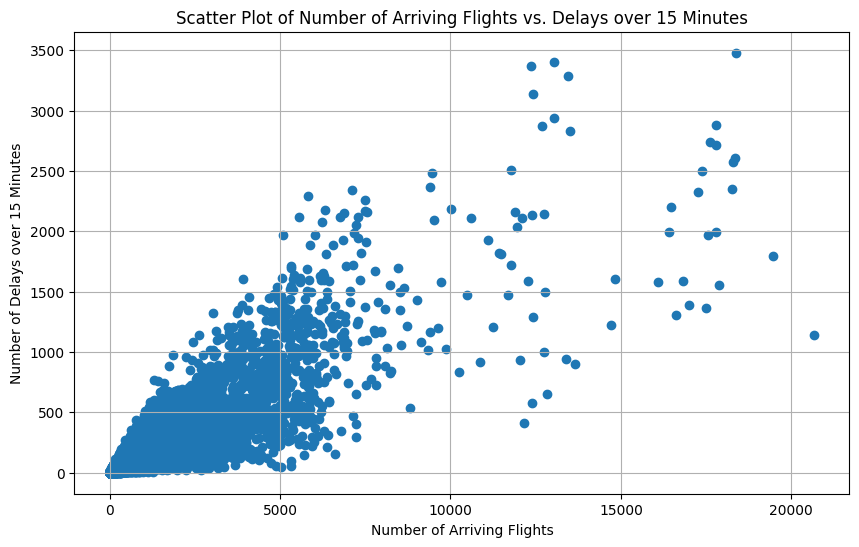

0.8871865735146494


In [19]:
#Q3 b
plt.figure(figsize=(10, 6))
plt.scatter(df['arr_flights'], df['arr_del15'])
plt.title('Scatter Plot of Number of Arriving Flights vs. Delays over 15 Minutes')
plt.xlabel('Number of Arriving Flights')
plt.ylabel('Number of Delays over 15 Minutes')
plt.grid(True)
plt.show()

correlation = df['arr_flights'].corr(df['arr_del15'])
print(correlation)

From the scatter plot generated, we can see the relationship between the number of arriving flights and the number of delays over 15 minutes. From the distribution of the points, it appears there is a positive correlation of around 0.887 between these two variables: as the number of arriving flights increases, the number of delays over 15 minutes also tends to increase.

The scatter is more densely populated at the lower end of both axes, which indicates that smaller numbers of flights are more frequently associated with lower numbers of delays. As we move towards the higher end of the 'Number of Arriving Flights' axis, the points spread out more, suggesting variability increases with the larger number of flights. The relationship is not perfectly linear though due to noise and some outlier. Nevertheless, the positive correlation is still clearly observed

Overall, the scatter plot suggests a general trend where more arriving flights can lead to more delays, but with significant variability and some exceptions to the trend.

In [24]:
#Q4 airline
# grouping the data by carrier_name and sum the delays
carrier_delays = df.groupby('carrier_name').agg({
    'arr_del15': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()

most_delayed_airline = carrier_delays.loc[carrier_delays['arr_del15'].idxmax()]
print(most_delayed_airline)


carrier_name           Southwest Airlines Co.
arr_del15                            593189.0
carrier_delay                      10997055.0
weather_delay                        633295.0
nas_delay                           4181903.0
security_delay                        89676.0
late_aircraft_delay                14134417.0
Name: 15, dtype: object


- In this part above, we identifed the airline with the most delays and we will analyze what is the leading cause fo delays for the carrier.
- The carrier that seems to have the most delays is Southwest Airlines. we will now visualize the reasons for the delays.

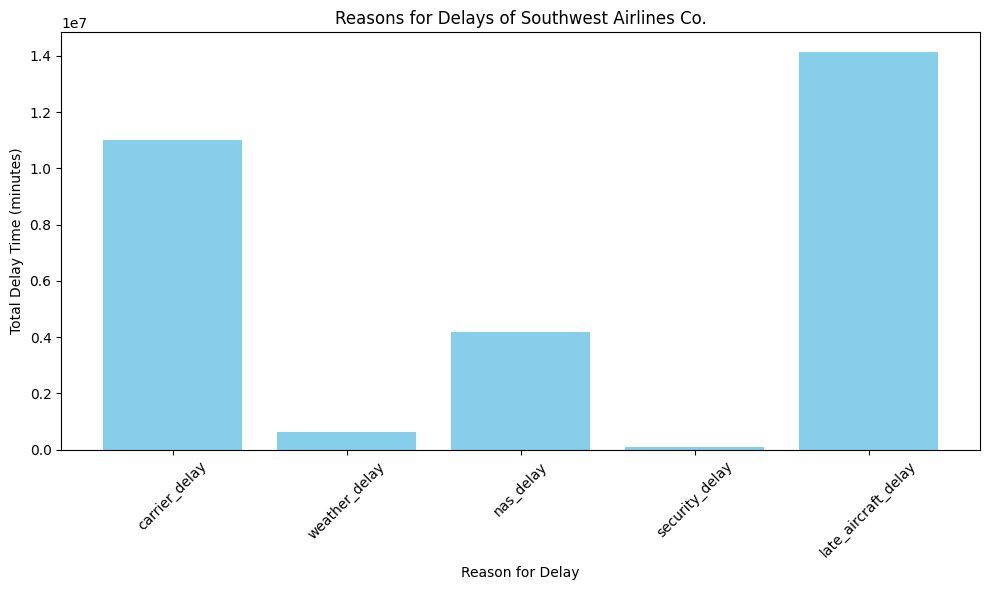

In [25]:
#Q4 airline 2

plt.figure(figsize=(10, 6))
reasons = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
delay_amounts = most_delayed_airline[reasons]
plt.bar(reasons, delay_amounts, color='skyblue')
plt.title(f'Reasons for Delays of {most_delayed_airline["carrier_name"]}')
plt.xlabel('Reason for Delay')
plt.ylabel('Total Delay Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


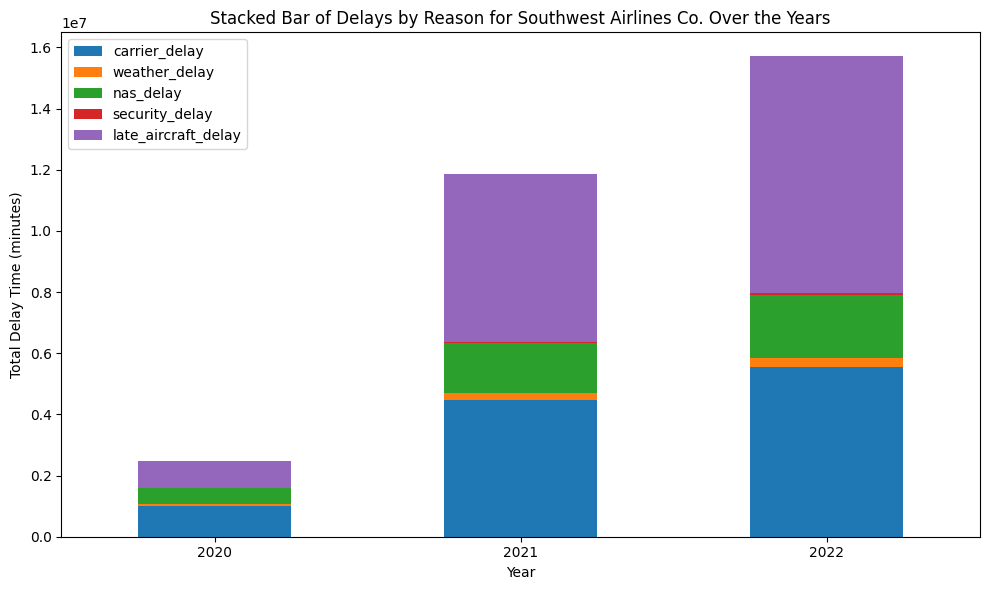

In [45]:
#Q4 airlines visuals
most_delayed_airline_data = df[df['carrier_name'] == most_delayed_airline['carrier_name']]
summary_most_delayed_airline = most_delayed_airline_data.groupby('year')[reasons].sum()

summary_most_delayed_airline.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(f'Stacked Bar of Delays by Reason for {most_delayed_airline["carrier_name"]} Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Delay Time (minutes)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Now we can clearly see that the leading reason for delay for Southwest is late aircraft delay. This is then followed by carrier delay and Nas delay which seems like it has carried over the trend from the total dataset.

In [36]:
#Q4 airport
# group the data by airport_name and sum the delays
airport_delays = df.groupby('airport').agg({
    'arr_del15': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()

# airport with the most number of delays
most_delayed_airport = airport_delays.loc[airport_delays['arr_del15'].idxmax()]
print(most_delayed_airport)


airport                      DFW
arr_del15               136598.0
carrier_delay          3916607.0
weather_delay           886876.0
nas_delay              2021324.0
security_delay           21569.0
late_aircraft_delay    4179443.0
Name: 99, dtype: object


We have now repeated the same steps we have done to find the airline with the most delays to get the airport with the most delays. DFW or Dallas Fort Worth International Airport seems to be the airport with the most delays, this was also observed earlier in the sorted bar chart, lets dive into what are the causes for the delay in this airport and whether its the airports fault or more carrier reasons.

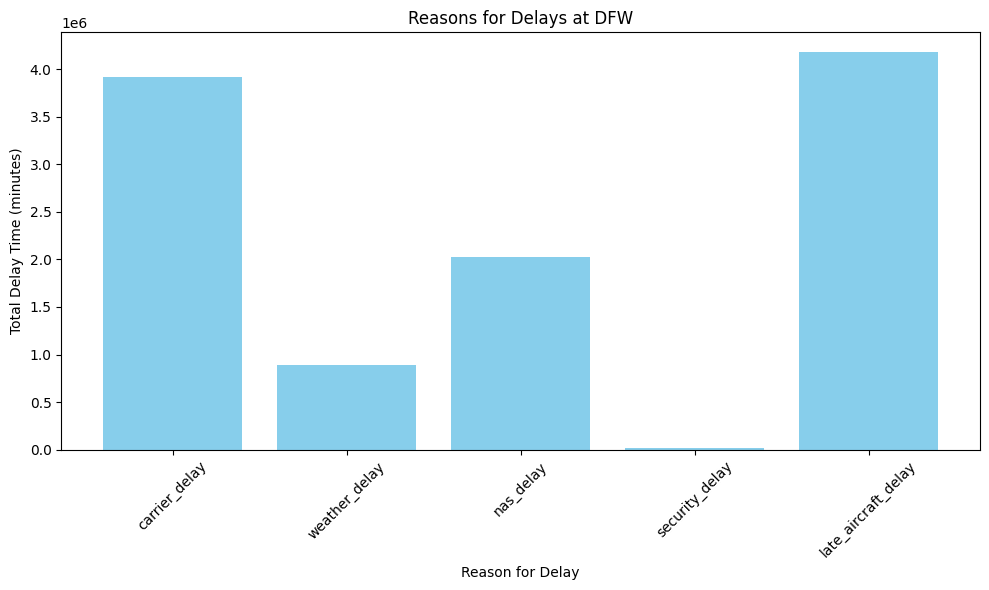

In [41]:
#Q4 airport 2
# Assuming you've already computed 'airport_delays' as in step 3
most_delayed_airport_name = most_delayed_airport['airport']

# Plot a bar chart to show delay reasons for the most delayed airport
plt.figure(figsize=(10, 6))
delay_amounts_airport = most_delayed_airport[reasons]
plt.bar(reasons, delay_amounts_airport, color='skyblue')
plt.title(f'Reasons for Delays at {most_delayed_airport_name}')
plt.xlabel('Reason for Delay')
plt.ylabel('Total Delay Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot parameters for better fit
plt.show()


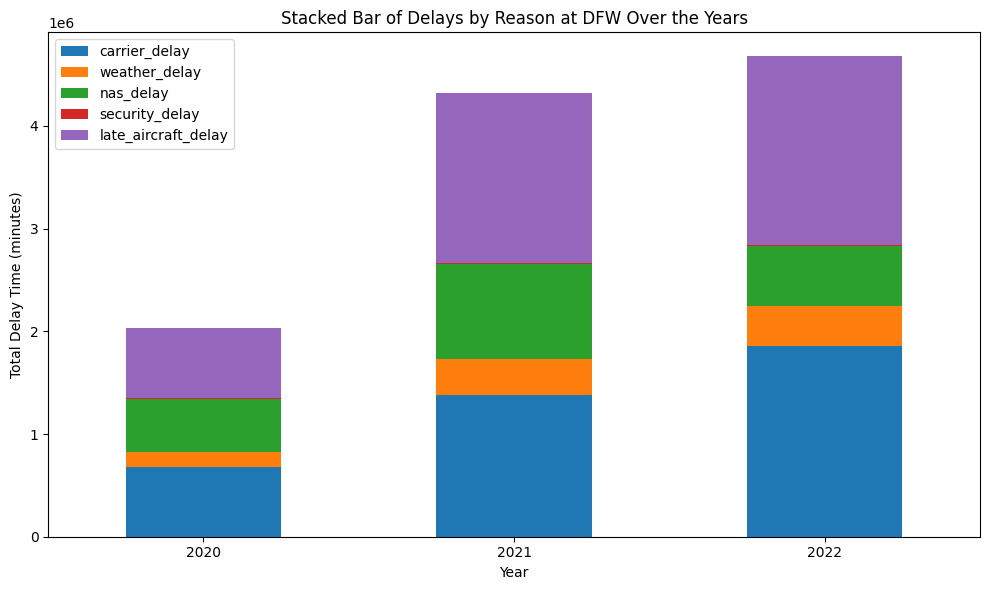

In [47]:
#Q4 airports - visuals
most_delayed_airport_data = df[df['airport'] == most_delayed_airport_name]
summary_most_delayed_airport = most_delayed_airport_data.groupby('year')[reasons].sum()

summary_most_delayed_airport.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(f'Stacked Bar of Delays by Reason at {most_delayed_airport_name} Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Delay Time (minutes)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The general trend of the dataset seems to have carried over, the main cause for delay at DFW is also late aircrafts followed by carrier delay but the margin and difference between them seem to be alot lower than that observed in the most delayed airline. the ranking of the other reasons for delays is also identical to the airline, and the rest of the dataset.

In [43]:
#Q4 other relevant stats
# summary statistics for each airline
carrier_summary_stats = df.groupby('carrier_name')[reasons].agg(['mean', 'median', 'std']).reset_index()

# summary statistics for each airport
airport_summary_stats = df.groupby('airport')[reasons].agg(['mean', 'median', 'std']).reset_index()

# airlines
print("Summary statistics for airlines:")
print(carrier_summary_stats)

# airports
print("Summary statistics for airports:")
print(airport_summary_stats)



Summary statistics for airlines:
               carrier_name carrier_delay                      weather_delay  \
                                     mean  median          std          mean   
0      Alaska Airlines Inc.    577.312360   152.0  1759.617354     69.793373   
1             Allegiant Air    419.623234   128.0   910.339912     85.207670   
2    American Airlines Inc.   2941.973241   784.0  8357.297448    387.253412   
3      Delta Air Lines Inc.   2111.026760   493.0  6393.284104    222.327187   
4         Endeavor Air Inc.    552.726020   170.0  1682.304692    131.704557   
5                 Envoy Air    330.696238    93.0  1404.146740    161.607723   
6   ExpressJet Airlines LLC    160.724913    22.5   535.854466     29.975779   
7    Frontier Airlines Inc.    593.833038   107.0  1590.209172     47.165782   
8    Hawaiian Airlines Inc.    998.207773   338.0  2370.568339     72.173393   
9               Horizon Air    461.717373   181.0  1030.171927     69.364736   
10     

- Here is a summary of the statistics of all the airlines and Airports in the United States and their delays.
- The general trend of delays seem to continue for all the airports and all the airlines as observed before.

In conclusion we have observed the general trends when it comes to the reasoning behind trip delays in all US airports in the period (2022 to 2023). We have identified the main reasons and ranking of delays, we have found the airport and airlines with the most delays and further looked at their causes.
We can conclude that the general delay reasons for that period of time applies to most airports and airline in the same ranking.
We must also note that this trend can be observed due to breakout of the pandemic that occured very shortly prior to this period (around 2019). In this period, airports and airlines had to follow strict regulations and rules, along with recommendations from the world health organization (WHO) to operate safely and in a healthy manner.